## Imports

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import h5py
import pandas as pd

## Read in file

In [2]:
dust_xy = "snapshot_150_O1_dust_rho_xy.fits"
with fits.open(dust_xy) as hdul:
    dust_density_xy = hdul[0].data
    header_xy = hdul[0].header

dust_xz = "snapshot_150_O1_dust_rho_xz.fits"
with fits.open(dust_xz) as hdul:
    dust_density_xz = hdul[0].data
    header_xz = hdul[0].header

dust_yz = "snapshot_150_O1_dust_rho_yz.fits"
with fits.open(dust_yz) as hdul:
    dust_density_yz = hdul[0].data
    header_yz = hdul[0].header

sed = "snapshot_150_O1_sed.dat"
with open(sed, 'r') as file:
    sed_content = file.read()
    print(sed_content)

# SED at inclination 90 deg, azimuth 0 deg, distance 1e8 pc
# column 1: wavelength; lambda (micron)
# column 2: total flux; F_nu (Jy)
3.680044815e-01 1.257206411e-220
4.782264547e-01 1.040540199e-166
6.217817151e-01 8.580171950e-139
7.532275894e-01 1.554442244e-121
8.685060707e-01 1.041976282e-110
9.730059041e-01 2.154246709e-99



## Conversions

In [6]:
# going from msun/au^3 to g/cm^3
msun_to_g = u.Msun.to('g')
au_to_cm = u.AU.to('cm')
conv_factor = msun_to_g / (au_to_cm)**3
dust_density_cgs_xy = dust_density_xy * conv_factor
dust_density_cgs_xz = dust_density_xz * conv_factor
dust_density_cgs_yz = dust_density_yz * conv_factor

## Density Plot

/tmp/ipykernel_102/162552448.py:20: RuntimeWarning: divide by zero encountered in log10
  im = axes[0, i].imshow(np.log10(data), cmap='viridis', origin='lower')
/tmp/ipykernel_102/162552448.py:34: RuntimeWarning: divide by zero encountered in log10
  im = axes[1, i].imshow(np.log10(data), cmap='viridis', origin='lower')


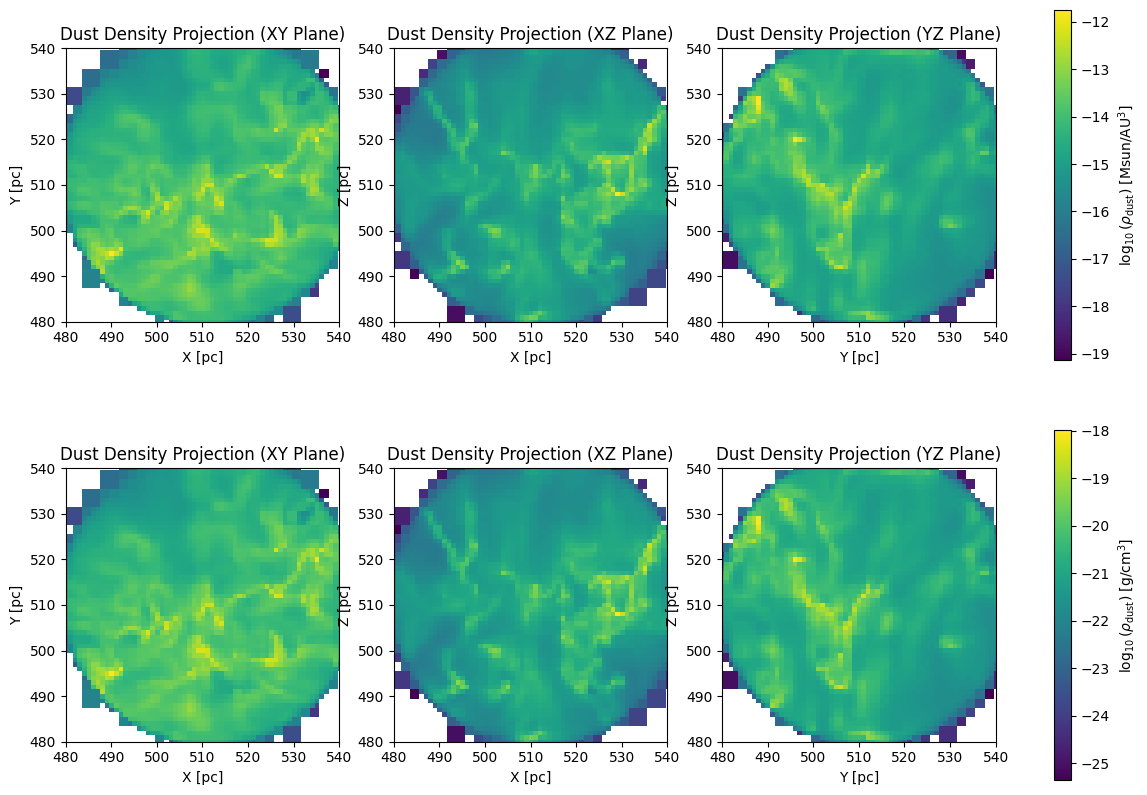

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# data
plot_data_row1 = [dust_density_xy, dust_density_xz, dust_density_yz]
plot_data_row2 = [dust_density_cgs_xy, dust_density_cgs_xz, dust_density_cgs_yz]

row_titles = [
    'Dust Density Projection (XY Plane)',
    'Dust Density Projection (XZ Plane)',
    'Dust Density Projection (YZ Plane)']

row1_xlabel = ['X [pc]', 'X [pc]', 'Y [pc]']
row1_ylabel = ['Y [pc]', 'Z [pc]', 'Z [pc]']
row2_xlabel = ['X [pc]', 'X [pc]', 'Y [pc]']
row2_ylabel = ['Y [pc]', 'Z [pc]', 'Z [pc]']

# row 1 plots
images_row1 = []
for i, data in enumerate(plot_data_row1):
    im = axes[0, i].imshow(np.log10(data), cmap='viridis', origin='lower')
    images_row1.append(im)
    axes[0, i].set_xlabel(row1_xlabel[i])
    axes[0, i].set_ylabel(row1_ylabel[i])
    axes[0, i].set_title(row_titles[i])
    axes[0, i].set_xlim(480, 540)
    axes[0, i].set_ylim(480, 540)

# single color bar for the first row
fig.colorbar(images_row1[0], ax=axes[0, :].ravel().tolist(), label=r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')

# row 2 plots
images_row2 = []
for i, data in enumerate(plot_data_row2):
    im = axes[1, i].imshow(np.log10(data), cmap='viridis', origin='lower')
    images_row2.append(im)
    axes[1, i].set_xlabel(row2_xlabel[i])
    axes[1, i].set_ylabel(row2_ylabel[i])
    axes[1, i].set_title(row_titles[i])
    axes[1, i].set_xlim(480, 540)
    axes[1, i].set_ylim(480, 540)

# single color bar for the second row
fig.colorbar(images_row2[0], ax=axes[1, :].ravel().tolist(), label=r'$\log_{10}(\rho_{\rm dust})$ [g/cm$^3$]')

#plt.tight_layout()
plt.savefig('dust_density_xy_dual_units_log.png', dpi=300)
plt.show()

## SED Plot

From snapshot_150_01_sed.dat. The file contains wavelength and flux data. Want to plot this to show the overall energy output of the simulated system across different wavelengths. This should verify the radiative transfer from SKIRT.

Text(0.5, 1.0, 'Spectral Energy Distribution (loglog)')

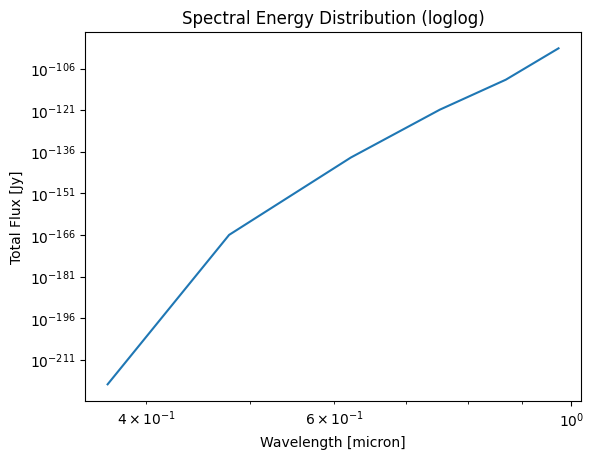

In [40]:
x_data = np.loadtxt(sed)[:,0]
y_data = np.loadtxt(sed)[:,1]
plt.loglog(x_data, y_data)
plt.xlabel('Wavelength [micron]')
plt.ylabel('Total Flux [Jy]')
plt.title('Spectral Energy Distribution (loglog)')

## Histogram

In [15]:
flat_density = dust_density.flatten()
flat_dust = flat_density[flat_density > 0]
flat_dust_cgs = flat_dust * conv_factor

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# msun/au^3
axes[0].hist(np.log10(flat_dust), bins=50)
axes[0].set_xlabel(r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')
axes[0].set_ylabel('Count')
axes[0].set_title('Dust Density (Log Scale)')
axes[0].grid()

# g/cm^3
axes[1].hist(np.log10(flat_dust_cgs), bins=50)
axes[1].set_xlabel(r'$\log_{10}(\rho_{\rm dust})$ [g/cm$^3$]')
axes[1].set_ylabel('Count')
axes[1].set_title('Dust Density (Log Scale)')
axes[1].grid()

plt.tight_layout()
plt.savefig('dust_density_histogram_dual_units_log.png', dpi=300)
plt.show()

NameError: name 'dust_density' is not defined

## Overplotting stars on dust density plots

### Loading in the snapshot file

In [45]:
src_data = np.loadtxt("snapshot_150_src.txt")
print(src_data)
with open("snapshot_150_src.txt", 'r') as file:
    sed_content = file.read()
    print(sed_content)

[4.318677 4.319285 4.313995 ... 3.959575 3.608515 4.059861]
# x (pc) y (pc) z (pc) smoothingLength (pc) radius (pc) temperature (K)
4.318677e+00 4.270150e+00 4.169924e+00 9.046823e-04 4.057131e+00 3.175777e+00
4.319285e+00 4.267916e+00 4.171379e+00 2.735631e-04 1.017647e+00 7.850209e+01
4.313995e+00 4.268630e+00 4.170874e+00 1.117908e-03 1.375772e+00 3.166118e+00
4.314681e+00 4.267432e+00 4.168150e+00 1.776408e-03 9.509696e-01 3.166119e+00
4.317635e+00 4.266569e+00 4.171523e+00 6.826444e-04 1.912589e+00 3.220254e+00
4.317656e+00 4.266551e+00 4.171490e+00 6.671727e-04 1.656652e+00 4.321127e+00
4.317482e+00 4.266709e+00 4.171464e+00 7.693556e-04 1.808020e+00 1.068678e+01
4.318545e+00 4.265430e+00 4.171376e+00 2.594996e-04 3.516909e+00 1.400464e+01
4.318497e+00 4.265457e+00 4.171406e+00 2.647065e-04 3.466343e+00 8.723617e+00
4.186086e+00 3.813559e+00 4.561609e+00 3.581891e-03 1.212917e+00 3.166120e+00
4.183758e+00 3.816761e+00 4.568174e+00 3.953882e-04 1.787471e+00 1.295511e+01
4.185334e+

In [16]:
# getting the star coords
snap_file = 'snapshot_150.hdf5'
with h5py.File(snap_file, 'r') as f:
    star_coords = f['PartType5']['Coordinates'][:]

/tmp/ipykernel_102/3174394649.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(dust_density_xy), cmap='viridis', origin='lower')


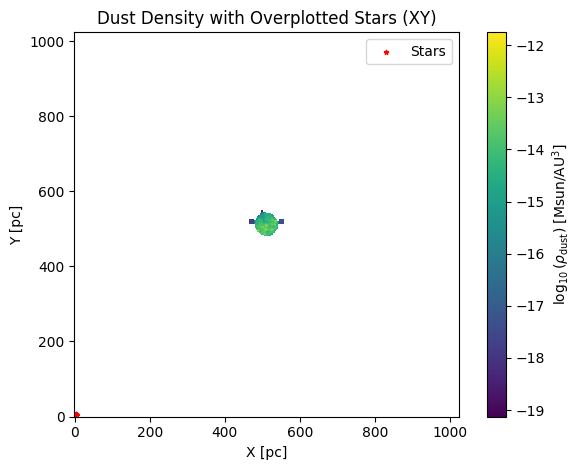

In [46]:
#star_x = star_coords[:, 0]
#star_y = star_coords[:, 1]
src_data = np.loadtxt("snapshot_150_src.txt")
star_x = src_data[:, 0]
star_y = src_data[:, 1]
plt.imshow(np.log10(dust_density_xy), cmap='viridis', origin='lower')
plt.colorbar(label=r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')
plt.scatter(star_x, star_y, s=10, color='red', marker='*', label='Stars')
plt.xlabel('X [pc]')
plt.ylabel('Y [pc]')
plt.title('Dust Density with Overplotted Stars (XY)')
plt.legend()
plt.tight_layout()
plt.savefig('dust_density_with_stars_xy_log.png', dpi=300)
plt.show()

/tmp/ipykernel_1557/381899573.py:37: RuntimeWarning: divide by zero encountered in log10
  np.log10(dust_density_xy),


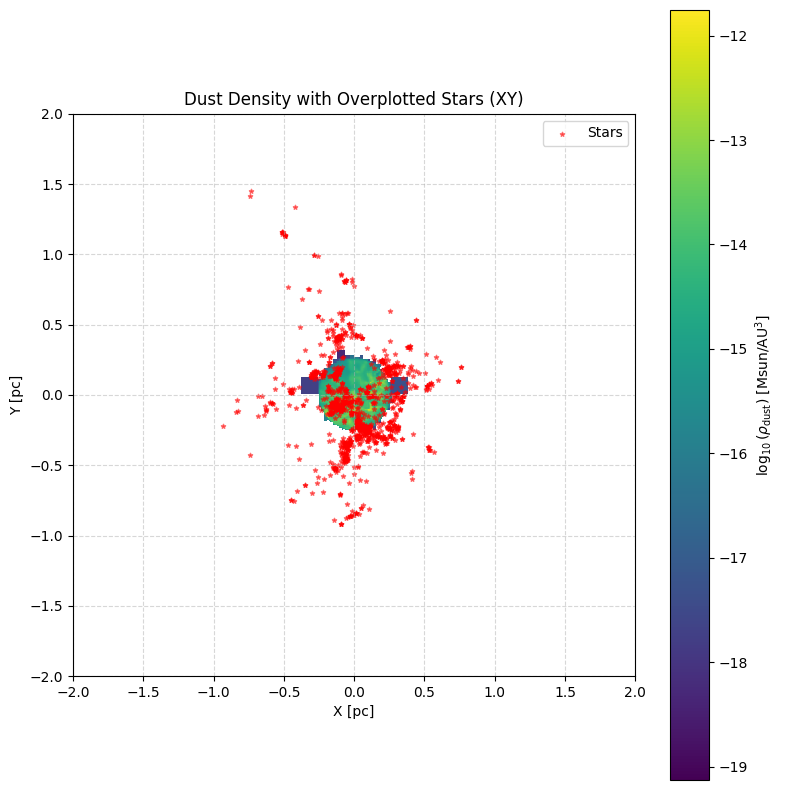

In [4]:
src_file= "snapshot_150_src.txt"
src_data = np.loadtxt(src_file)

star_x = src_data[:, 0]
star_y = src_data[:, 1]

src_data_for_plot = {'x (pc)': star_x, 'y (pc)': star_y}

from SnapUtils import read_snapshot_info
snapshot_file = 'snapshot_150.hdf5'
temp_snap_head, _, _ = read_snapshot_info(snapshot_file)
snap_head_for_plot = temp_snap_head 

box_size_pc = snap_head_for_plot.get('BoxSize (pc)', 1.0)
center_coords = snap_head_for_plot.get('Center (pc)', np.zeros(3))

#-box_size_pc/2 to +box_size_pc/2 relative to its center
x_min_plot = -box_size_pc / 2.0
x_max_plot = box_size_pc / 2.0
y_min_plot = -box_size_pc / 2.0
y_max_plot = box_size_pc / 2.0
extent = [x_min_plot, x_max_plot, y_min_plot, y_max_plot]

#centering
star_x_centered = src_data_for_plot['x (pc)'] - center_coords[0]
star_y_centered = src_data_for_plot['y (pc)'] - center_coords[1]

#filtering stars
in_range = (star_x_centered >= x_min_plot) & (star_x_centered <= x_max_plot) & \
           (star_y_centered >= y_min_plot) & (star_y_centered <= y_max_plot)
star_x_plot = star_x_centered[in_range]
star_y_plot = star_y_centered[in_range]


plt.figure(figsize=(8, 8))
plt.imshow(
    np.log10(dust_density_xy),
    cmap='viridis',
    origin='lower',
    extent=extent
)
plt.colorbar(label=r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')
plt.scatter(
    star_x_plot, #centered star coordinates
    star_y_plot, #centered star coordinates
    s=10,
    color='red',
    marker='*',
    label='Stars',
    alpha=0.5
)
plt.xlabel('X [pc]')
plt.ylabel('Y [pc]')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Dust Density with Overplotted Stars (XY)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('dust_density_with_stars_xy_log.png', dpi=300)
plt.show()

## Temperature Peaks - Gas Temperature Map

/tmp/ipykernel_102/2046298290.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='inferno')


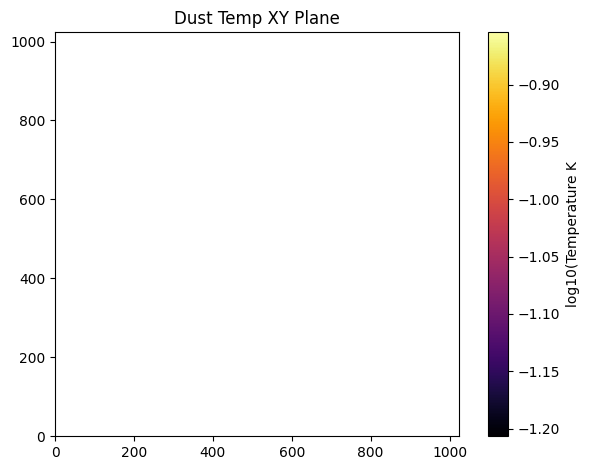

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                    1 / Array value scale                              
BZERO   =                    0 / Array value offset                             
DATE    = '2025-06-17T14:08:31' / Date and time of creation (UTC)               
ORIGIN  = 'SKIRT simulation'   / Astronomical Observatory, Ghent University     
BUNIT   = 'K       '        

In [18]:
with fits.open("snapshot_150_temp_dust_T_xy.fits") as hdul:
    data = hdul[0].data
    header = hdul[0].header
    
plt.imshow(np.log10(data), origin='lower', cmap='inferno')
plt.colorbar(label='log10(Temperature K')
plt.title('Dust Temp XY Plane')

plt.tight_layout()
plt.show()

print(header.tostring(sep='\n', padding=60))

##  Radial Energy Density Profile / Stars Colored by Mass

In [19]:
with fits.open("snapshot_150_O1_total.fits") as hdul:
    data = hdul[0].data
    header = hdul[0].header
    

print(header.tostring(sep='\n', padding=60))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  800 / length of data axis 1                          
NAXIS2  =                  800 / length of data axis 2                          
NAXIS3  =                    6 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                    1 / Array value scale                              
BZERO   =                    0 / Array value offset                             
DATE    = '2025-06-24T15:16:03' / Date and time of creation (UTC)               
ORIGIN  = 'SKIRT simulation'

## Massive vs Low Mass Stars